In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/AIML_IITG/SVM/wine_fraud.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [10]:
df["quality"].value_counts()

,count
quality,
Legit,6251
Fraud,246


In [ ]:
sns.countplot()

In [14]:
red_df=df[df['type']== 'red']

In [13]:
white_df = df[df['type']== 'white']

In [17]:
red_df[red_df['quality']=='Fraud']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.00,Fraud,red
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.80,Fraud,red
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.30,Fraud,red
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,Fraud,red
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.20,Fraud,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.10,Fraud,red
1482,7.2,0.580,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.30,Fraud,red
1484,6.8,0.910,0.06,2.0,0.060,4.0,11.0,0.99592,3.53,0.64,10.90,Fraud,red
1505,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,Fraud,red


In [19]:
fraud_red_percentage = len(red_df[red_df['quality']=='Fraud']*100/(len(red_df)))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [20]:
df["Fraud"]=df["quality"].map({"Legit":0,"Fraud":1})

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


In [22]:
df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Fraud
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.021794
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.151228
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.061789
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.048756
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.034499
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.085204
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.035252
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.016351
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.020107
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.034046


<Axes: >

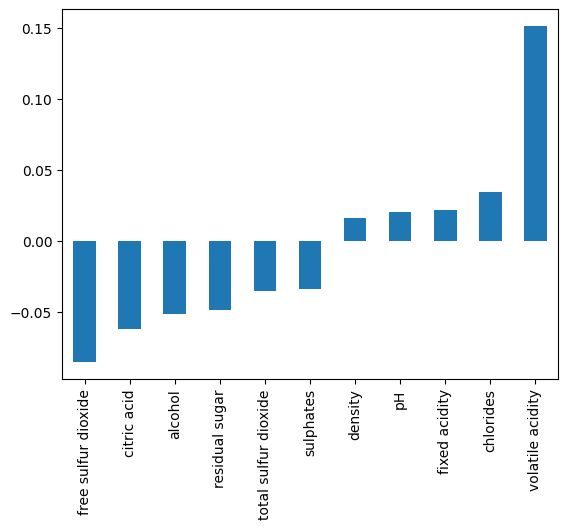

In [25]:
df.corr(numeric_only=True)["Fraud"][:-1].sort_values().plot(kind="bar")

# Machine Learning

In [26]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0


In [33]:
df["Type"]=pd.get_dummies(df["type"],drop_first=True).astype(float)

In [39]:
X = df.drop(['quality','Fraud','type'],axis=1)
y = df["quality"]

In [40]:
from numpy.random import rand
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.1)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [42]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type
868,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,0.0
5097,6.4,0.30,0.36,2.0,0.052,18.0,141.0,0.99273,3.38,0.53,10.5,1.0
5450,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7,1.0
5850,7.0,0.24,0.24,1.8,0.047,29.0,91.0,0.99251,3.30,0.43,9.9,1.0
2192,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,1.0


In [43]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {"C":[0.001,0.01,0.1,0.5,0.8,1],
              "gamma":['scale','auto']}

In [46]:
grid = GridSearchCV(svc,param_grid)

In [47]:
grid.fit(x_train_scaled,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.8, 1],
                         'gamma': ['scale', 'auto']})

In [48]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
grid_pred = grid.predict(x_test_scaled)
grid_pred

array(['Legit', 'Fraud', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Fraud', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Fraud', 'Fraud', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Fraud', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Fraud',
       'Legit', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Fraud',
       'Legit', 'Legit', 'Legit', 'Fraud', 'Fraud', 'Legit', 'Legit',
       'Fraud', 'Fraud', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit', 'Legit',
       'Legit', 'Legit', 'Legit', 'Legit', 'Fraud', 'Legit', 'Legit',
       'Legit', 'Leg

In [51]:
confusion_matrix(y_test,grid_pred)

array([[ 17,  10],
       [ 92, 531]])

In [52]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

